In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('/home/rachel/Documents/lfp2spikes/modularized_code') 
from evalutation.plotting.plotting import PLOTTER
from data_prep.data_preparation import DATA_PREP
from data_loader.lfp_loader import LFP_LOADER

Epiphyte Tube version loaded.
Connecting fkaltenberger@134.2.168.111:3306


In [2]:
pltr = PLOTTER()

<Figure size 774x270 with 0 Axes>

In [3]:
path = "../experiments/grid_search_alpha_L1wt/gs_s[1, 2, 3, 4, 5]_channels_1-5_MUA_c(30, 2)_b20/2022_Jul_20-09_36_36/"
alphas = np.arange(0.0, 0.3, 0.01)
splits = [1,2,3,4,5]
channels = [1,2,3,4,5]
n_channels = len(channels)
n_splits = len(splits)

In [4]:
#np.array(trial_df["losses"].values.tolist()).flatten()
#np.repeat(np.array(splits), n_channels)
channels * 2

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [5]:
trials = []
for a in alphas: 
    trial_df = pd.read_pickle(path+f"CV_a{a}.csv")
    #trial_df["alpha"] = a
    #trial_df["split"] = np.arange(0,len(trial_df), 1)
    trial_exp_df = pd.DataFrame({
        "losses" : np.array(trial_df["losses"].values.tolist()).flatten(), 
        "splits" : np.repeat(np.array(splits), n_channels),
        "unit" : np.array(channels * n_splits),
        "alpha" : a
    })
    trials.append(trial_exp_df)

exp_df = pd.concat(trials, ignore_index=True)
exp_df.head()

,losses,splits,unit,alpha
0,280995.327264,1,1,0.0
1,133430.917165,1,2,0.0
2,41595.731623,1,3,0.0
3,31397.602827,1,4,0.0
4,26567.793264,1,5,0.0


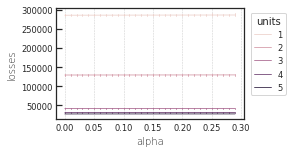

In [6]:
fig3 = pltr.plot_reg_loss(exp_df)

plt.subplots_adjust(
    left=0.18, right=0.83, top=0.97, bottom=0.2
)
fig3.savefig('plots/plot3.png')
fig3.savefig('plots/plot3.pdf')

In [70]:
trials = []
for a in alphas: 
    trial_df = pd.read_pickle(path+f"CV_a{a}.csv")
    trial_df["alpha"] = a
    trial_df["split"] = np.arange(0,len(trial_df), 1)
    trials.append(trial_df)

exp_df = pd.concat(trials, ignore_index=True)
exp_df.head()

,costs,theta,losses,preds,alpha,unit
0,19014.202643,"[[-2.823703492206324, -0.11091406751802795, -0...","[280995.3272639291, 133430.9171646988, 41595.7...","[56612.609538446646, 20125.433002724592, 7589....",0.000,0
1,19014.202643,"[[-2.772587619543808, -0.1449638732914278, -0....","[291638.54179049237, 125511.22064349893, 42505...","[54218.44465074336, 25964.232027954182, 5764.3...",0.000,1
2,19013.090512,"[[-2.8234750743073804, -0.09003199309627845, -...","[281003.33875034656, 133431.29574211728, 41595...","[56612.88896226455, 20126.771555529176, 7588.3...",0.001,0
3,19013.090512,"[[-2.7721119320748877, -0.07606506493613077, -...","[291663.25967251393, 125514.13771406046, 42513...","[54221.36969810581, 25958.743169656147, 5761.3...",0.001,1
4,19011.210756,"[[-2.820278964335769, -0.04322609312049462, -0...","[281082.335181402, 133434.3359342664, 41608.35...","[56625.715185760324, 20134.5683387162, 7581.57...",0.010,0


In [61]:
exp_df["losses"] = exp_df["losses"].apply(lambda x : np.array(x))
exp_df["final loss"] = exp_df["losses"].apply(lambda x : x[-1])
exp_df["theta"] = exp_df["theta"].apply(lambda x : np.array(x))
exp_df["preds"] = exp_df["preds"].apply(lambda x : np.array(x))
exp_df.head()

,costs,theta,losses,preds,alpha,unit,final loss
0,19790.061547,"[[-2.823703492206324, -0.11091406751802795, -0...","[280995.3272639291, 133430.9171646988, 41595.7...","[56612.609538446646, 20125.433002724592, 7589....",0.0,0,26567.793264
1,19790.061547,"[[-2.796118139403444, -0.08570071601643611, -0...","[287051.8991317541, 132789.01163885256, 42810....","[53783.42388356427, 24791.78766399046, 7867.63...",0.0,1,26936.074282
2,19790.061547,"[[-2.772587619543808, -0.1449638732914278, -0....","[291638.54179049237, 125511.22064349893, 42505...","[54218.44465074336, 25964.232027954182, 5764.3...",0.0,2,27844.132636
3,19790.061547,"[[-2.7995927039913484, -0.19313931078202645, -...","[286674.7468404896, 127652.08169039477, 42015....","[55211.30861258162, 24664.837748954607, 8197.4...",0.0,3,29297.711365
4,19790.061547,"[[-2.820496035460132, -0.14850344583372369, -0...","[281872.8146599587, 127776.85533553091, 39768....","[56786.571585433165, 28134.830248176688, 8949....",0.0,4,27598.044411


In [64]:
exp_df["theta"][0]

array([[-2.82370349e+00, -1.10914068e-01, -6.51127698e-02,
        -2.95896982e-02, -5.67525608e-03,  8.08441416e-03,
         1.29026548e-02,  1.41891546e-02,  1.23345769e-02,
         1.15825801e-02,  6.99986052e-03,  6.73735734e-03,
         1.05389439e-02,  8.46707264e-03,  6.37889894e-03,
         2.32428511e-03, -8.37418462e-04, -1.23490491e-03,
         4.53555633e-03,  1.45426219e-02,  2.37669591e-02,
         3.00896292e-02,  2.61672176e-02,  1.15626130e-02,
        -1.24315411e-02, -3.82568623e-02, -5.48459060e-02,
        -5.06242048e-02, -4.56282135e-03,  8.59402774e-02,
         2.30309841e-01],
       [-3.82837686e+00,  7.06178000e-04,  3.87427892e-03,
         6.45976514e-03,  7.98554034e-03,  8.25346596e-03,
         7.81635316e-03,  6.94623739e-03,  5.87816382e-03,
         5.22223412e-03,  4.18482069e-03,  3.82242836e-03,
         4.88327184e-03,  6.09628413e-03,  5.56500459e-03,
         5.24775311e-03,  5.26738067e-03,  5.34226325e-03,
         5.93935525e-03,  8.04

<AxesSubplot:xlabel='alpha', ylabel='final loss'>

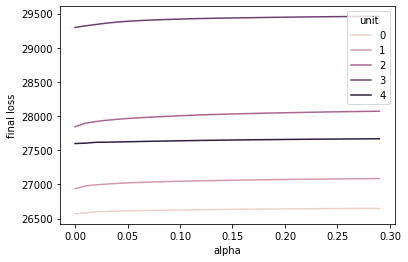

In [62]:
sns.lineplot(x="alpha", y="final loss", data=exp_df, hue="unit")